# ECE 462 - Homework #6


# Problem 6.1.1

There is no difference between the two simulations, showcasing how the exact energies of the lattice are not nearly as impactful as the structure (spacing) of the lattice itself.

# Problem 6.1.3

$$\lambda_n=\frac{2d}{n}=\frac{2\cdot 50 \text{ A}}{1}=10\text{ nm}$$

$$E=\frac{(\frac{\hbar}{\lambda})^2}{2m}=\frac{(\frac{6.58\cdot10^{-16}}{10\cdot10^{-9}})^2}{2\cdot9.109\cdot10^{-31}}$$

Thus, the energy range for the conduction band is: $E=15\text{ meV}$

How many time steps? 1500


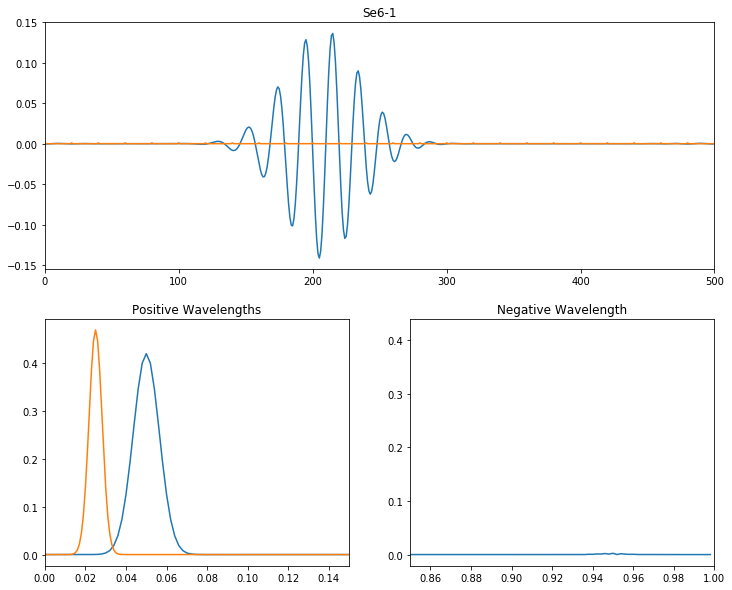

How many time steps? 0


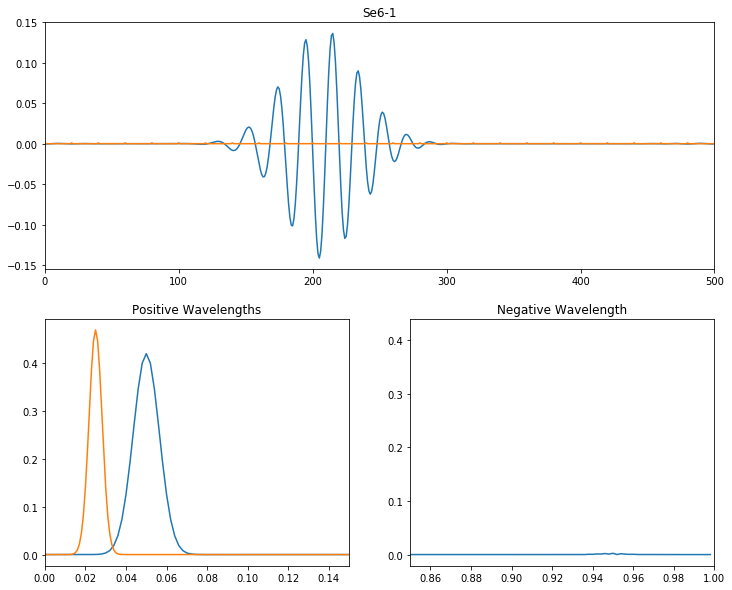

In [50]:
## import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns
from pylab import rcParams
%matplotlib inline

NN = 500;      hbar = 1.054e-34; hplank = 6.625e-34
m0 = 9.11e-31; melec = m0;       eV2J = 1.6e-19
J2eV = 1/eV2J; del_x = 0.1e-9;   dt = 0.02e-15
ra = 0.5 * hbar / melec * dt / (del_x ** 2)
DX = del_x * 1e10; XX = np.arange(0, DX * NN, DX)

# Create Potential
V = np.zeros((NN)); nspace = 20; V0 = 1e-3 * eV2J
for n in range(10 // nspace, NN // nspace):
    V[int(nspace * n)] = V0
    
FTK = np.fft.fft(J2eV * V)
del_K = 1 / NN; KK = np.arange(0, del_K * (NN - 1) + del_K, del_K)

# Initialize the sine wave in gaussian envelope
sigma = 35; lambda_ = 20; nc = 100
prl = np.zeros((NN)); pim = np.zeros((NN)); ptot = 0
for n in range(1, NN):
    prl[n] = np.exp(-1 * ((n - nc) / sigma) ** 2) * np.cos(2 * np.pi * (n - nc) / lambda_)
    pim[n] = np.exp(-1 * ((n - nc) / sigma) ** 2) * np.sin(2 * np.pi * (n - nc) / lambda_)
    ptot += prl[n] ** 2 + pim[n] ** 2
pnorm = np.sqrt(ptot)
    
# Normalize and Check
prl = prl / pnorm; pim = pim / pnorm; ptot = prl ** 2 + pim ** 2

T = 0; n_step = 1; 
while n_step > 0:
    n_step = int(input('How many time steps? '))
    for m in range(n_step):
        T += 1
        
        # Part of the PBC
        prl[0] = prl[0] - ra * (pim[NN - 2] - 2 * pim[0] + pim[1] + (dt / hbar) * V[0] * pim[0])
        prl[NN - 1] = prl[0]
        
        for n in range(1, NN - 1):
            prl[n] = prl[n] - ra * (pim[n-1] - 2 * pim[n] + pim[n+1] + (dt / hbar) * V[n] * pim[n])
            
        pim[0] += + ra * (prl[NN - 2] - 2 * prl[0] + prl[1] - (dt / hbar) * V[0] * prl[0])
        pim[NN - 1] = pim[0]
        
        for n in range(1, NN - 1):
            pim[n] += ra * (prl[n-1] - 2 * prl[n] + prl[n+1] - (dt / hbar) * V[n] * prl[n])
            
    PE = 0; psi=np.zeros((NN), dtype=complex)
    for n in range(NN - 1):
        psi[n] = complex(prl[n], pim[n])
        PE += psi[n] * np.conj(psi[n]) * V[n]
        
    PE *= J2eV
    ke = complex(0, 0)
    for n in range(1, NN - 1):
        lap_p = psi[n + 1] - 2 * psi[n] + psi[n-1]
        ke += lap_p * np.conj(psi[n])
        
    KE = -((hbar / del_x) ** 2 / (2 * melec)) * np.real(ke)
    KE = J2eV * KE
    
    m_eff = (0.5 / KE) * (hplank / (lambda_ * del_x)) ** 2 / melec
    
    rcParams['figure.figsize'] = 12, 10
    plt.subplot(211)
    plt.plot(XX, prl)
    plt.plot(XX, J2eV * V)
    plt.xlim(0, DX * NN)
#     plt.ylim(-2e-3, 2e-3)
    plt.title('Se6-1')
    
    plt.subplot(223)
    plt.plot(KK, (1 / np.sqrt(NN)) * abs(np.fft.fft(psi)))
    plt.plot(0.5 * KK, 0.05 * abs(np.fft.fft(psi)))
    plt.xlim(0, 0.15)
    plt.title('Positive Wavelengths')
    
    plt.subplot(224)
    plt.plot(KK, 1 / np.sqrt(NN) * abs(np.fft.fft(psi)))
    plt.xlim(0.85, 1)
    plt.title('Negative Wavelength')
    plt.show()

How many time steps? 1500


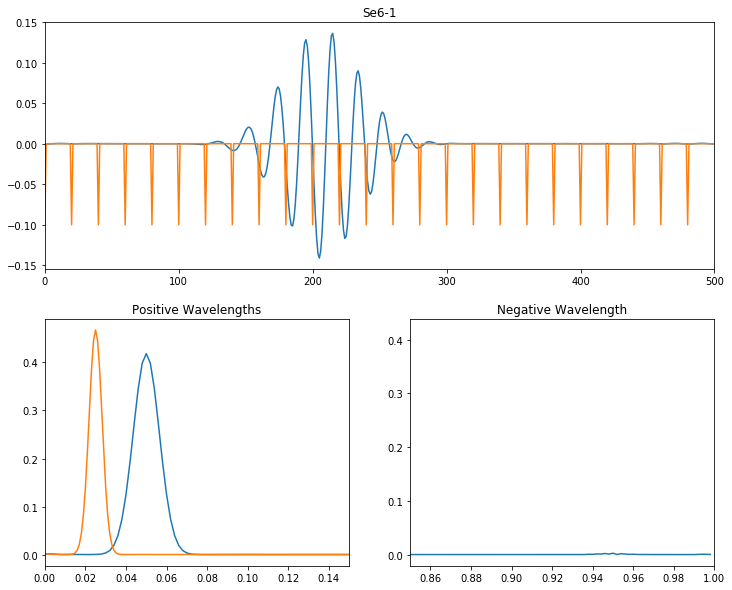

How many time steps? 0


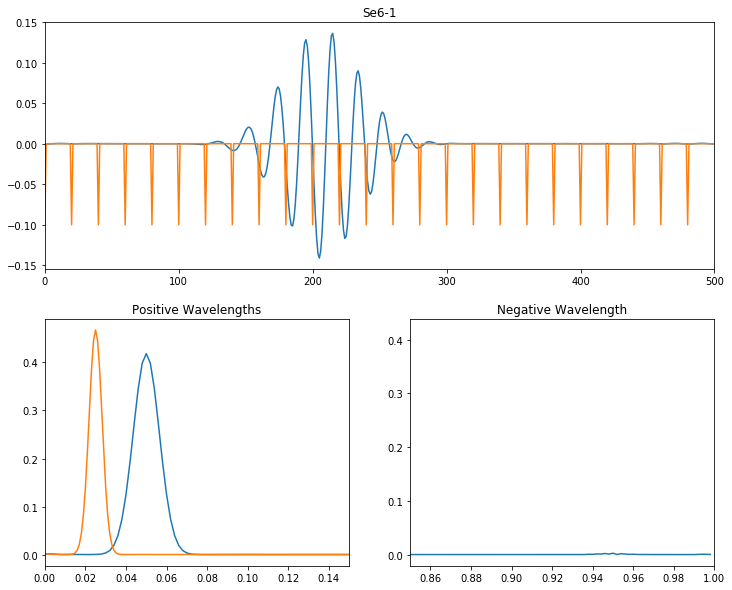

In [49]:
## import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns
from pylab import rcParams
%matplotlib inline

NN = 500;      hbar = 1.054e-34; hplank = 6.625e-34
m0 = 9.11e-31; melec = m0;       eV2J = 1.6e-19
J2eV = 1/eV2J; del_x = 0.1e-9;   dt = 0.02e-15
ra = 0.5 * hbar / melec * dt / (del_x ** 2)
DX = del_x * 1e10; XX = np.arange(0, DX * NN, DX)

# Create Potential
V = np.zeros((NN))
nspace = 20
V0 = -.1 * eV2J
for n in range(10 // nspace, NN // nspace):
    V[int(nspace * n)] = V0
    
FTK = np.fft.fft(J2eV * V)

del_K = 1 / NN
KK = np.arange(0, del_K * (NN - 1) + del_K, del_K)

# Initialize the sine wave in gaussian envelope
sigma = 35; lambda_ = 20; nc = 100
prl = np.zeros((NN)); pim = np.zeros((NN)); ptot = 0
for n in range(1, NN):
    prl[n] = np.exp(-1 * ((n - nc) / sigma) ** 2) * np.cos(2 * np.pi * (n - nc) / lambda_)
    pim[n] = np.exp(-1 * ((n - nc) / sigma) ** 2) * np.sin(2 * np.pi * (n - nc) / lambda_)
    ptot += prl[n] ** 2 + pim[n] ** 2
pnorm = np.sqrt(ptot)
    
# Normalize and Check
prl = prl / pnorm; pim = pim / pnorm; ptot = prl ** 2 + pim ** 2

T = 0; n_step = 1; 
while n_step > 0:
    n_step = int(input('How many time steps? '))
    for m in range(n_step):
        T += 1
        
        # Part of the PBC
        prl[0] = prl[0] - ra * (pim[NN - 2] - 2 * pim[0] + pim[1] + (dt / hbar) * V[0] * pim[0])
        prl[NN - 1] = prl[0]
        
        for n in range(1, NN - 1):
            prl[n] = prl[n] - ra * (pim[n-1] - 2 * pim[n] + pim[n+1] + (dt / hbar) * V[n] * pim[n])
            
        pim[0] += + ra * (prl[NN - 2] - 2 * prl[0] + prl[1] - (dt / hbar) * V[0] * prl[0])
        pim[NN - 1] = pim[0]
        
        for n in range(1, NN - 1):
            pim[n] += ra * (prl[n-1] - 2 * prl[n] + prl[n+1] - (dt / hbar) * V[n] * prl[n])
            
    PE = 0; psi=np.zeros((NN), dtype=complex)
    for n in range(NN - 1):
        psi[n] = complex(prl[n], pim[n])
        PE += psi[n] * np.conj(psi[n]) * V[n]
        
    PE *= J2eV
    ke = complex(0, 0)
    for n in range(1, NN - 1):
        lap_p = psi[n + 1] - 2 * psi[n] + psi[n-1]
        ke += lap_p * np.conj(psi[n])
        
    KE = -((hbar / del_x) ** 2 / (2 * melec)) * np.real(ke)
    KE = J2eV * KE
    
    m_eff = (0.5 / KE) * (hplank / (lambda_ * del_x)) ** 2 / melec
    
    rcParams['figure.figsize'] = 12, 10
    plt.subplot(211)
    plt.plot(XX, prl)
    plt.plot(XX, J2eV * V)
    plt.xlim(0, DX * NN)
#     plt.ylim(-2e-3, 2e-3)
    plt.title('Se6-1')
    
    plt.subplot(223)
    plt.plot(KK, (1 / np.sqrt(NN)) * abs(np.fft.fft(psi)))
    plt.plot(0.5 * KK, 0.05 * abs(np.fft.fft(psi)))
    plt.xlim(0, 0.15)
    plt.title('Positive Wavelengths')
    
    plt.subplot(224)
    plt.plot(KK, 1 / np.sqrt(NN) * abs(np.fft.fft(psi)))
    plt.xlim(0.85, 1)
    plt.title('Negative Wavelength')
    plt.show()